In [ ]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
TRAINING_DIR = "/content/drive/MyDrive/Fire detection datasets/Datasets 1-2/Training"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
VALIDATION_DIR = "/content/drive/MyDrive/Fire detection datasets/Datasets 1-2/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                         target_size=(224,224),
                                         class_mode='categorical',
                                         batch_size = 64)
validation_generator = validation_datagen.flow_from_directory(      
                                           VALIDATION_DIR,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size= 16)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_generator,steps_per_epoch = 15,epochs = 50,validation_data = validation_generator,validation_steps = 15)

Epoch 1/50
15/15 [==============================] - 564s 36s/step - loss: 0.5495 - acc: 0.7107 - val_loss: 0.3961 - val_acc: 0.8243
Epoch 2/50
15/15 [==============================] - 44s 3s/step - loss: 0.3675 - acc: 0.8461 - val_loss: 0.3011 - val_acc: 0.8954
Epoch 3/50
15/15 [==============================] - 45s 3s/step - loss: 0.2852 - acc: 0.8958 - val_loss: 0.2308 - val_acc: 0.9205
Epoch 4/50
15/15 [==============================] - 44s 3s/step - loss: 0.2712 - acc: 0.8985 - val_loss: 0.2395 - val_acc: 0.9289
Epoch 5/50
15/15 [==============================] - 44s 3s/step - loss: 0.2888 - acc: 0.8930 - val_loss: 0.2279 - val_acc: 0.9289
Epoch 6/50
15/15 [==============================] - 45s 3s/step - loss: 0.2305 - acc: 0.9170 - val_loss: 0.2104 - val_acc: 0.9331
Epoch 7/50
15/15 [==============================] - 45s 3s/step - loss: 0.2227 - acc: 0.9225 - val_loss: 0.3034 - val_acc: 0.9121
Epoch 8/50
15/15 [==============================] - 44s 3s/step - loss: 0.2673 - acc: 0.

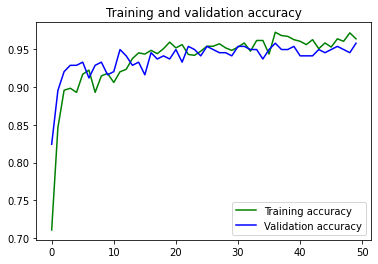

<Figure size 432x288 with 0 Axes>

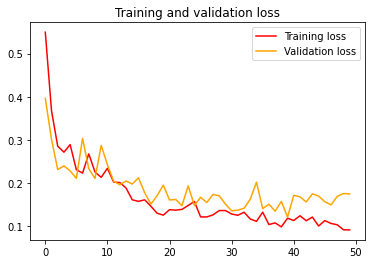

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

**Prediction**

**Test that fire is Detected**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving 81.jpg to 81.jpg
True 0.69952816


In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving 442.jpg to 442.jpg
False 0.606212


**Here**
1. **True** - Fire is Detected in the image with accuracy
2. **False**- Fire is not Detected in the image with accuracy